In [22]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading the Data

In [23]:
data = pd.read_csv("weatherAUS.csv")

In [24]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### checking missing values 

In [25]:
data.isnull().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Separation of Categorical (discrete) or Numerical (Contnious)

In [26]:
# Checking Categorical Features in dataset and counting it 
categorical_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features :",len(categorical_features))
print("Categorical Features ",categorical_features)

# Checking Numerical Features in dataset and counting it 
num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features :",len(num_features))
print("Numerical Features ", num_features)

Number of Categorical Features : 7
Categorical Features  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Number of Numerical Features : 16
Numerical Features  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [27]:
# Checking Cardanility
for i  in categorical_features:
  count = len(data[i].unique())
  print("The Cardinality of", i ,":" ,count)

The Cardinality of Date : 3436
The Cardinality of Location : 49
The Cardinality of WindGustDir : 17
The Cardinality of WindDir9am : 17
The Cardinality of WindDir3pm : 17
The Cardinality of RainToday : 3
The Cardinality of RainTomorrow : 3


### Handling Cardinatlity issue

In [28]:
data["Date"] = pd.to_datetime(data["Date"])  
data["Year"] = data["Date"].dt.year           
data["Month"] = data["Date"].dt.month         
data["Day"] = data["Date"].dt.day  
data.drop("Date", axis = 1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Handling Missing values

<BarContainer object of 6 artists>

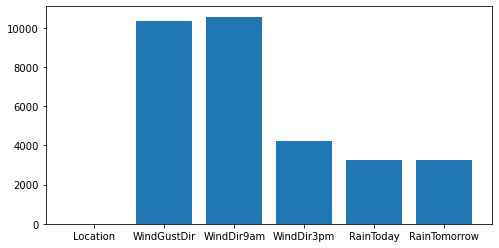

In [34]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype =="O"]
missing_cat = data[categorical_features].isnull().sum() # Total missing values 
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values )

#### each categorical_features is filled by most repeated value 

In [35]:
categorical_features_with_null = [features for features in categorical_features if data[features].isnull().sum()]  # list will return with categorical features
for feature in categorical_features_with_null:
  data[feature] = data[feature].fillna(data[feature].mode()[0])    
data[categorical_features].isnull().sum() 

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<BarContainer object of 19 artists>

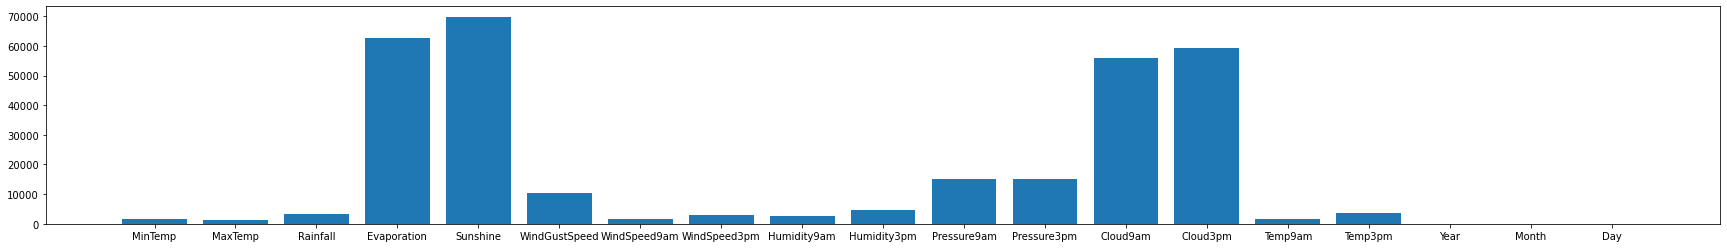

In [41]:
num_col = [num_col for num_col in data.columns if data[num_col].dtype !="O"] 
missing_num = data[num_col].isnull().sum()
missing_num
plt.figure(figsize= (30,4))
plt.bar(missing_num.index,missing_num.values )

In [42]:
# Remove Outliers from Numerical Features 
numerical_col_with_null_values = [col for col in num_col if data[col].isnull().sum()]
missing_values = data[numerical_col_with_null_values].isnull().sum()
missing_values
features_with_outliers = numerical_col_with_null_values
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

for features in numerical_col_with_null_values:
  data[features] = data[features].fillna(data[features].mean())   
data[numerical_col_with_null_values].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Exploring Numerical Variables

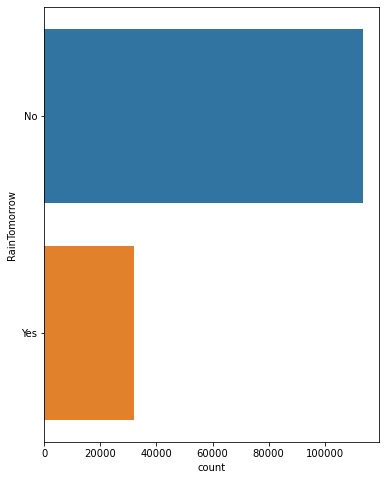

(145460, 6)

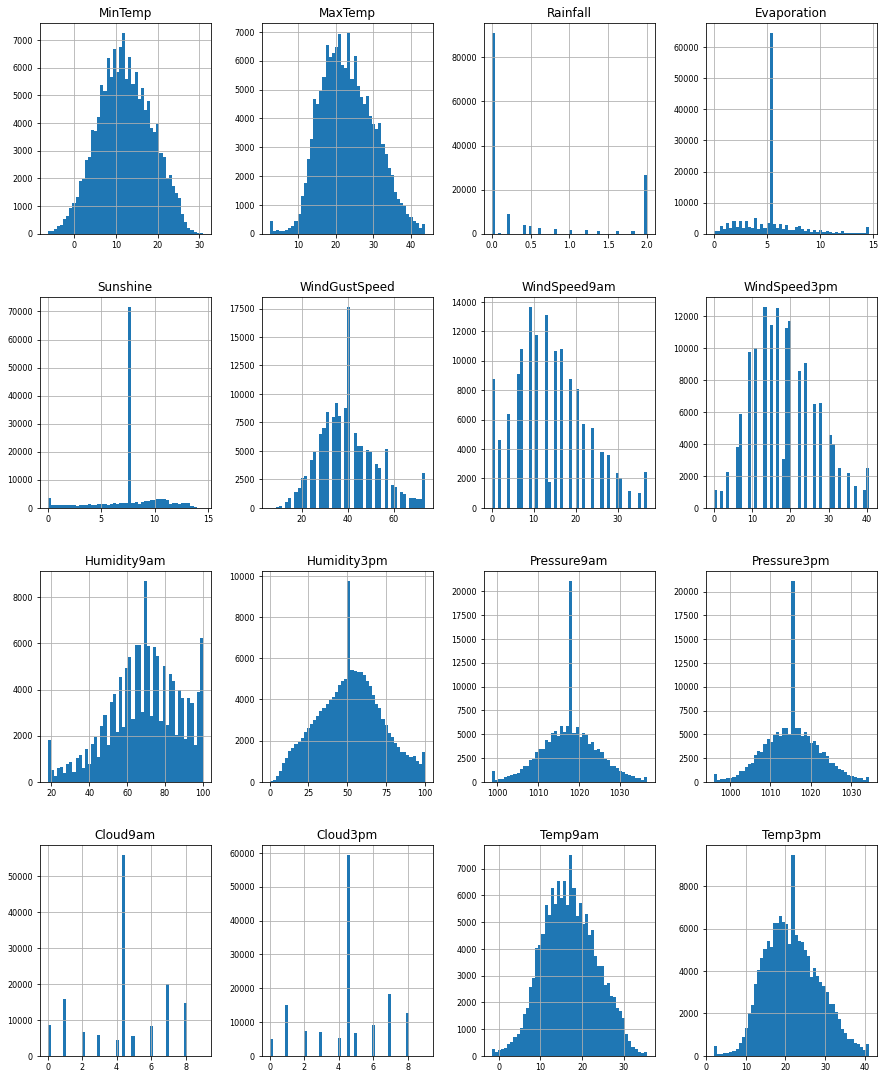

In [45]:
df_num = data.select_dtypes(include = ['float64'])

data['RainTomorrow'].unique()

#View the Frequency Distribution
data['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=data)
plt.show()

# Histogram for Numerical Variables

df_num.hist(figsize=(15, 19), bins=50, xlabelsize=8, ylabelsize=8)

# Exploring Categorical Variables

df_cat = data.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

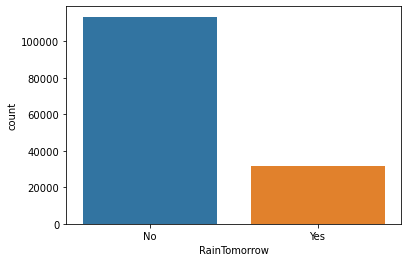

In [46]:
# Exploring Targeted Variable 
sns.countplot(data["RainTomorrow"])

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

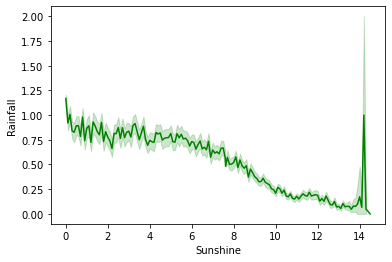

In [47]:
sns.lineplot(data= data,x="Sunshine",y="Rainfall",color = "green")
# we can see sunshine is inversely proportional to the Rainfall 

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

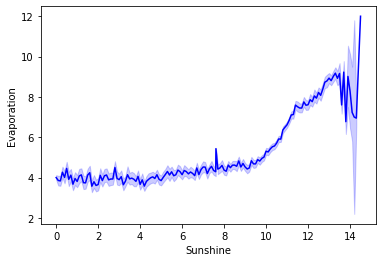

In [48]:
sns.lineplot(data= data,x="Sunshine",y="Evaporation",color = "blue")
# we can see sunshine is directly proportional to the Rainfall 

In [51]:
categorical_features = [i for i in data.columns if data[i].dtype == "O"]
categorical_features
# Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [53]:
def encode_cat(feature): 
  mapping_dict = {}        
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dict[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dict 

for i in categorical_features:   # we have the list of categorical features 
  data[i].replace(encode_cat(i), inplace = True)  
  print(data.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178            0   
1         0      7.4     25.1       0.0     5.318667  7.611178            1   
2         0     12.9     25.7       0.0     5.318667  7.611178            2   
3         0      9.2     28.0       0.0     5.318667  7.611178            3   
4         0     17.5     32.3       1.0     5.318667  7.611178            0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0           0           0  ...       1007.1  8.000000   
1           44.0           1           1  ...       1007.8  4.447461   
2           46.0           0           1  ...       1008.7  4.447461   
3           24.0           2           2  ...       1012.8  4.447461   
4           41.0           3           3  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0   4.50993     1

<AxesSubplot:>

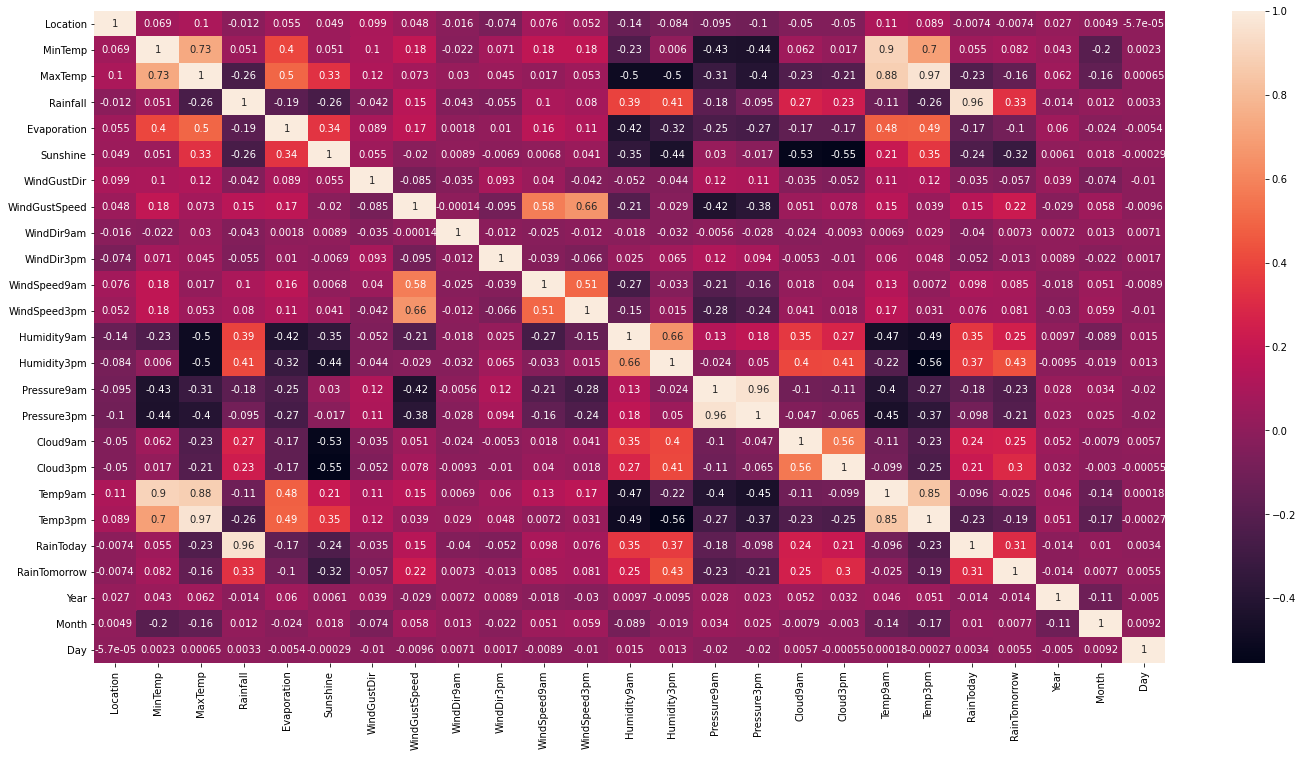

In [ ]:
plt.figure(figsize =(24,12))
sns.heatmap(data.corr(), annot = True)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

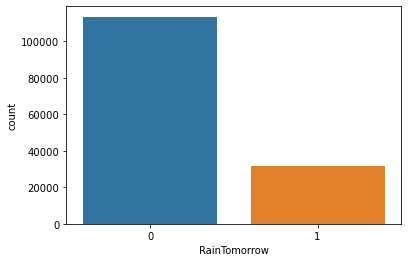

In [54]:
y = data["RainTomorrow"]  # dependent or target 
x = data.drop(["RainTomorrow"],axis = 1)  # indepedent or input 
sns.countplot(data["RainTomorrow"])

In [66]:
# over Sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

(227166, 24) (227166,)


In [67]:
# Feature Estimation
from sklearn.ensemble import ExtraTreesRegressor
feature_sel_model = ExtraTreesRegressor()
feature_sel_model.fit(x,y)
features_imp = feature_sel_model.feature_importances_
features_imp

array([0.02806936, 0.02098616, 0.02035258, 0.17976594, 0.01794175,
       0.04838986, 0.02449911, 0.04853449, 0.02144681, 0.02352801,
       0.02303263, 0.02348202, 0.02797561, 0.18265094, 0.02893547,
       0.04569883, 0.03241396, 0.07809643, 0.01963248, 0.01989522,
       0.01291202, 0.02281375, 0.02502287, 0.02392369])

<AxesSubplot:>

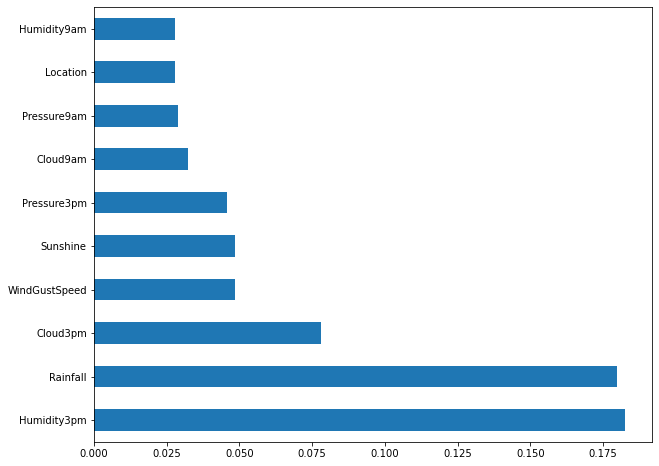

In [68]:
features_imp_val = pd.Series(features_imp, index = x.columns)
plt.figure(figsize=(10,8))
features_imp_val.nlargest(10).plot(kind = "barh")

### spliiting data into tarining and testing

In [69]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [ ]:
print("Length of Training Data:",len(x_train))
print("Length of Testing Data:",(len(x_test)))

Length of Training Data: 181732
Length of Testing Data: 45434


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [72]:
x_test = scaler.transform(x_test)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [74]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.791389708148083


In [ ]:
print("Train Data Score:",(classifier_logreg.score(x_train, y_train)))
print("Test Data Score:",(classifier_logreg.score(x_test, y_test)))

Train Data Score: 0.7915006713182048
Test Data Score: 0.791389708148083


### Confusion Martix

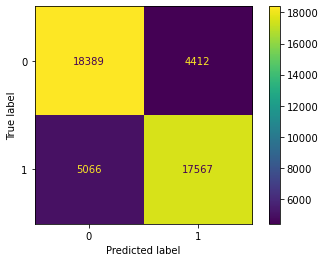

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

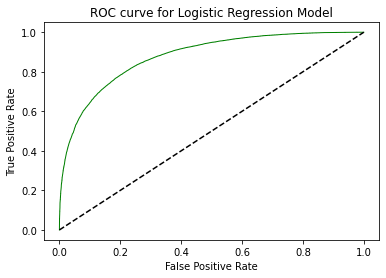

In [78]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:',(scores))
print('Average cross-validation score:',(scores.mean()))

Cross-validation scores:[0.79156464 0.79426087 0.78734936 0.79260441 0.79103615]
Average cross-validation score: 0.7913630890578596


In [80]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

model name  LogisticRegression()
accuracy  0.7914117180965796
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.795791697847427
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.9038825549148215


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_samples=0.9)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9)

In [ ]:
RandomForestClassifier(max_samples=0.9)


RandomForestClassifier(max_samples=0.9)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9052911916186116


In [ ]:
print("Train Data Score:",(classifier.score(x_train, y_train)))
print("Test Data Score:",(classifier.score(x_test, y_test)))

Train Data Score: 0.999983492175291
Test Data Score: 0.9052911916186116


In [ ]:
print("Train Data Score:",(classifier.score(x_train, y_train)))
print("Test Data Score:",(classifier.score(x_test, y_test)))

Train Data Score: 0.999983492175291
Test Data Score: 0.9052911916186116


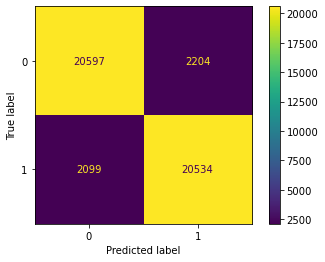

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)

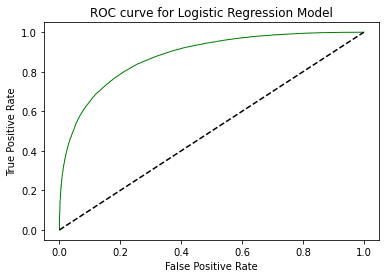

In [ ]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
import pickle
pickle.dump(rf, open('iri.pkl', 'wb'))
loaded_model = pickle.load(open("iri.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9066998283224017
